In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

import matplotlib.font_manager as fm
# 폰트 경로를 직접 지정 (터미널에서 찾은 경로를 넣기)
font_path = "/System/Library/Fonts/STHeiti Medium.ttc"  # 경로는 확인한 폰트에 맞게 수정!
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

import os
os.chdir('/Users/kyuyeonhwang/Desktop/Dissertation/Data')

In [2]:
df = pd.read_excel('BIS household credit comparison.xlsx')
df

,Time,United States,United Kindom,Korea,Japan,Germany,France,China,Euro Area
0,1945-12-31,29.442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1946-03-31,31.076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1946-06-30,32.727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1946-09-30,34.397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1946-12-31,36.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
310,2023-06-30,19579.946,2095.259,2216958.1,381564.3,2127.298,1763.711,76838.33,7733.441
311,2023-09-30,19753.286,2122.149,2237547.6,383745.8,2134.404,1766.871,77832.46,7734.149
312,2023-12-31,19918.177,2121.926,2246363.0,386298.8,2135.973,1766.653,78247.20,7730.675
313,2024-03-31,19966.652,2130.929,2248204.8,389349.7,2134.554,1760.611,79631.24,7731.025


In [3]:
# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

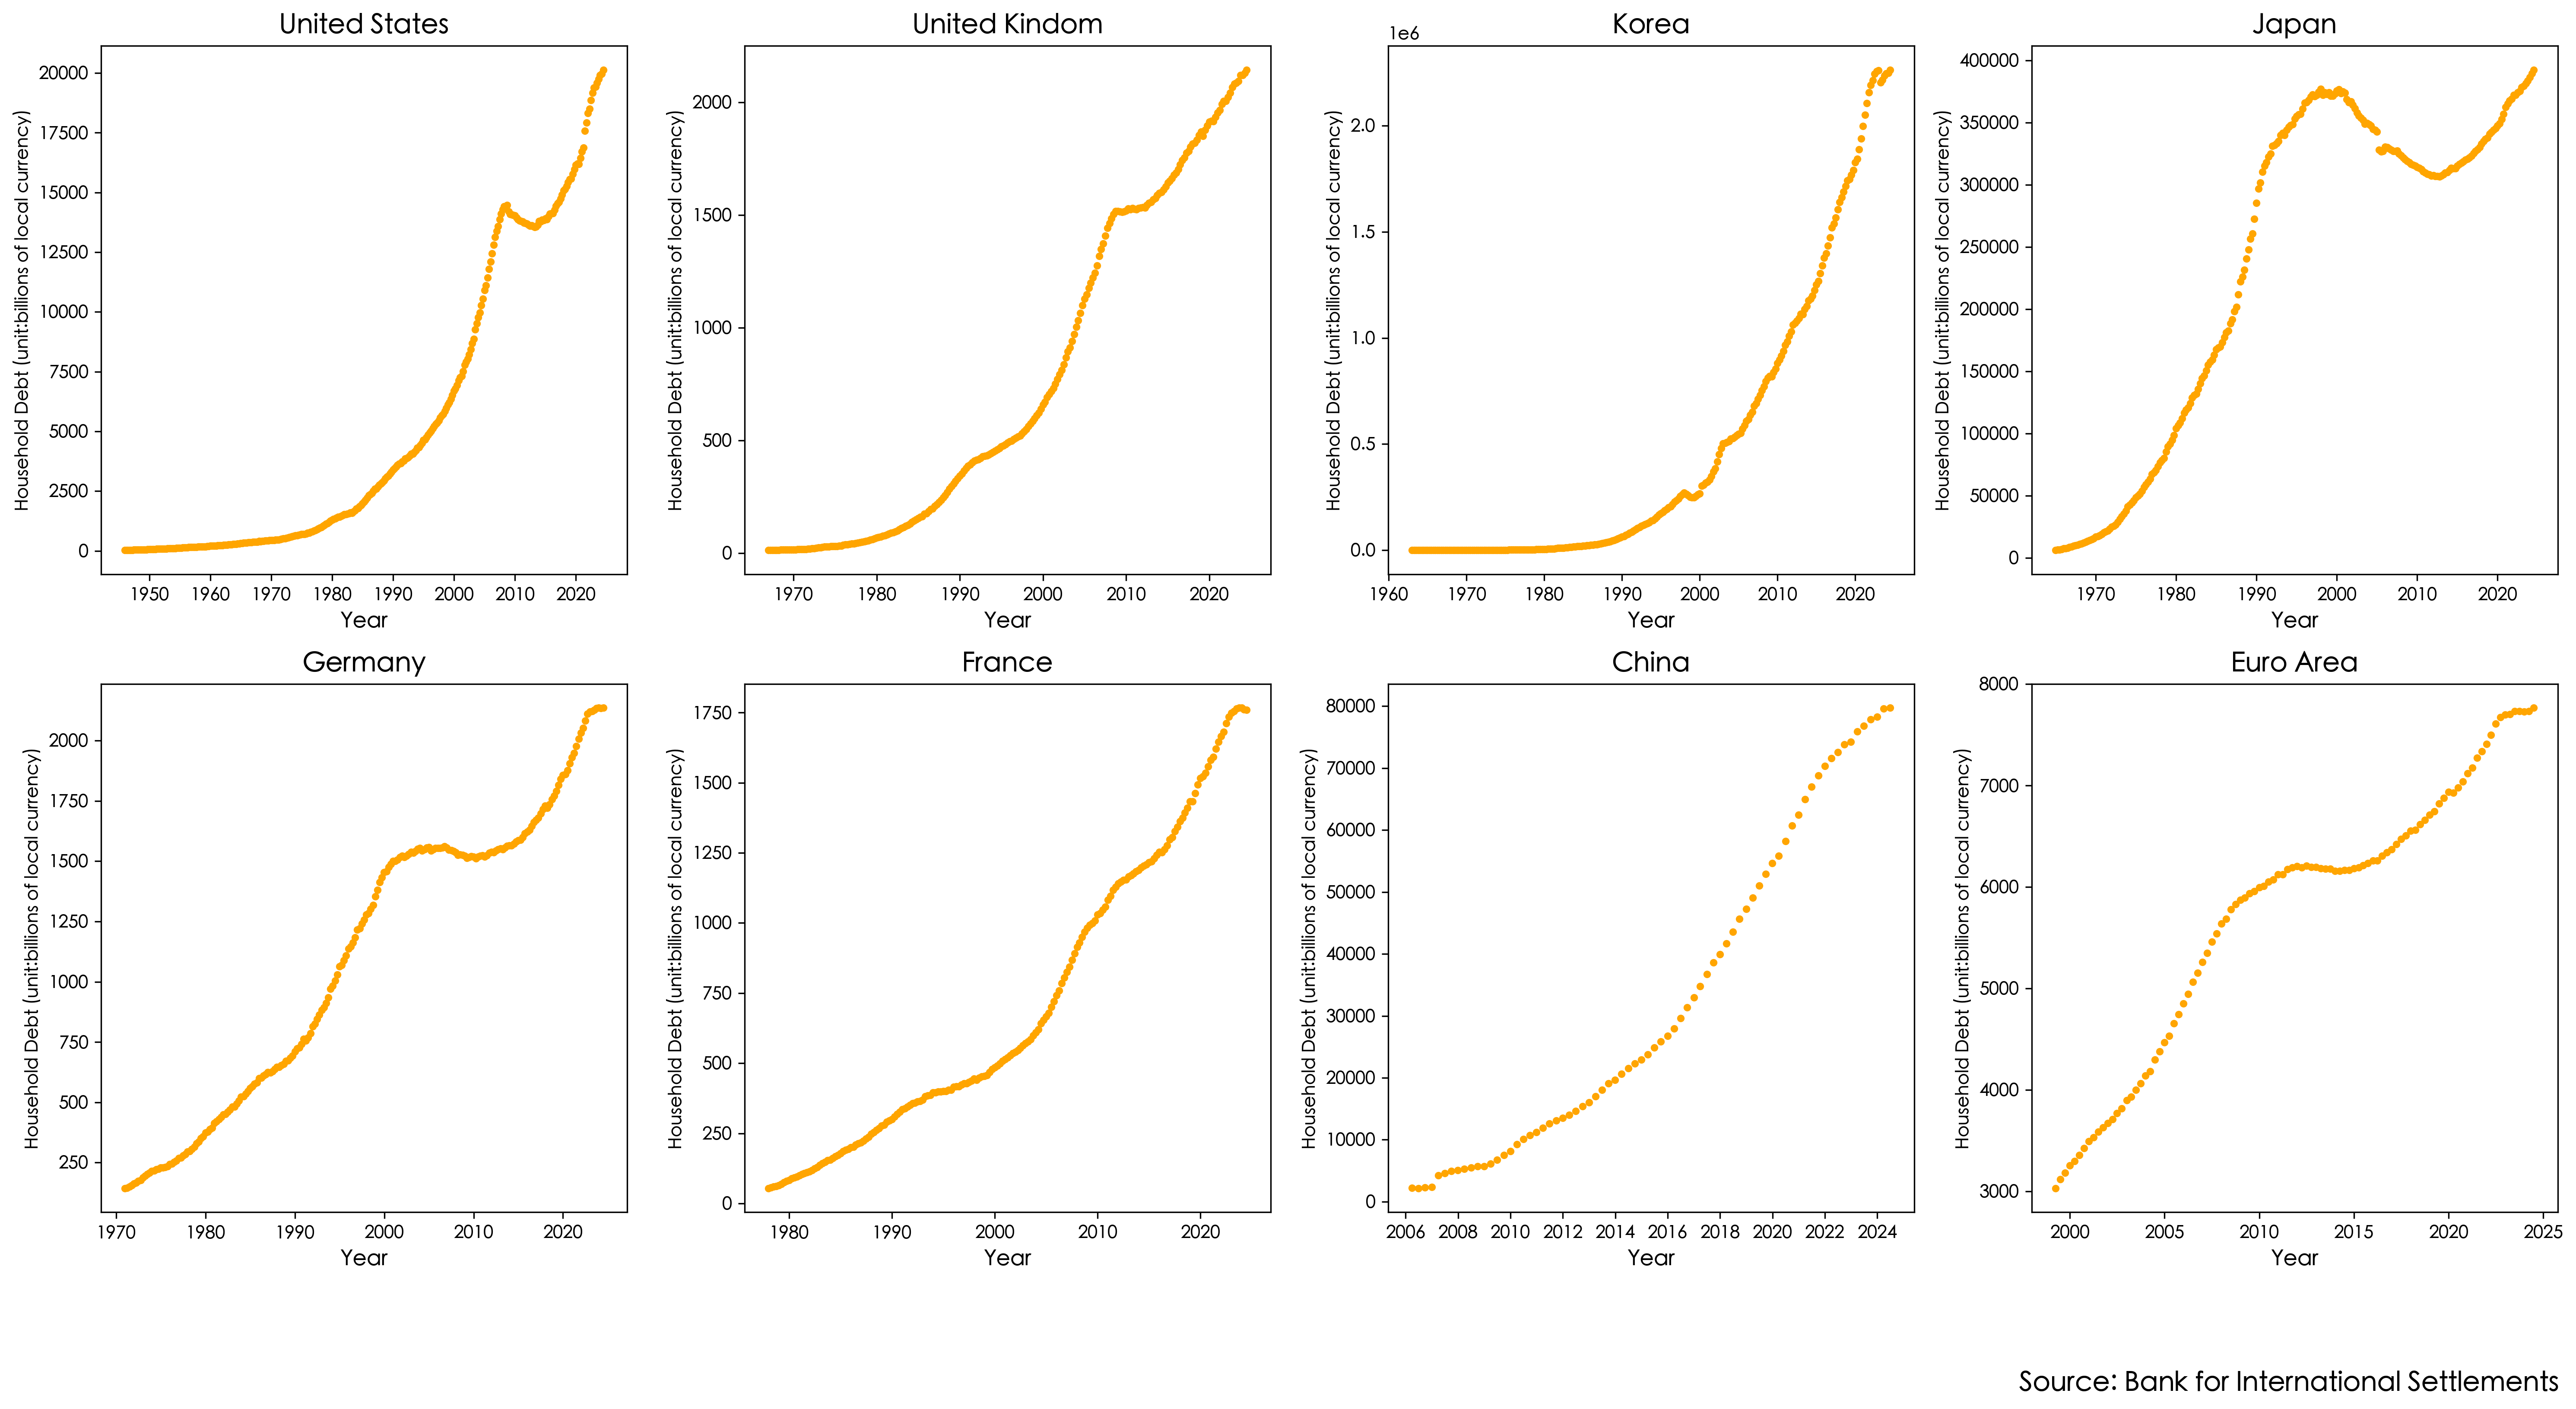

In [5]:
# 3. 대상 국가 리스트
countries = ["United States", "United Kindom", "Korea", "Japan", "Germany", "France", "China", "Euro Area"]

# 4. 서브플롯 생성 (2행 4열)
fig, axes = plt.subplots(2, 4, figsize=(20, 10), dpi=300)
axes = axes.flatten()  # 다차원 배열을 1차원 리스트로 변환

# 5. 각 국가별 그래프 그리기
for i, country in enumerate(countries):
    ax = axes[i]
    ax.scatter(df["Time"], df[country], color="orange", s=10)  # 작은 점 형태로 플롯
    ax.set_title(f"{country}", fontsize=15)  # 한자로 제목 추가
    ax.set_xlabel("Year", fontsize=12)  # X축 라벨 (시간)
    ax.set_ylabel("Household Debt (unit:billions of local currency)")  # Y축 라벨 (부채 금액, 만억원 단위)
    
if country == "China":
    ax.xaxis.set_major_locator(mdates.YearLocator(3))
elif country == "Euro Area":
    ax.xaxis.set_major_locator(mdates.YearLocator(5))
else:
    ax.xaxis.set_major_locator(mdates.YearLocator(10))
    #ax.xaxis.set_major_locator(mdates.YearLocator(10))  # 20년 단위로 눈금 설정
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # 연도만 출력
    plt.xticks(rotation=45)

# 데이터 출처 추가 (우측하단 정렬)
plt.figtext(0.99, -0.08, "Source: Bank for International Settlements", ha='right', fontsize=15, color='black')

# 6. 서브플롯 간격 조정 및 그래프 출력
plt.tight_layout()
plt.show()

In [12]:
## 2번째 Figure

In [4]:
# 엑셀 파일 불러오기
file_path = "Household Debt of Nominal GDP Quarterly compare.xlsx"
df_gdp = pd.read_excel(file_path, sheet_name="Sheet1")

In [5]:
# 날짜 형식으로 변환
df_gdp["Region"] = pd.to_datetime(df_gdp["Region"])

In [6]:
# 색상 지정 (업로드된 이미지의 색상과 동일하게 설정)
colors = {
    "China": "purple",
    "Germany": "green",
    "Japan": "limegreen",
    "United Kingdom": "black",
    "United States": "red",
    "France": "blue",
    "European Union": "orange",
    "South Korea": "darkred"
}

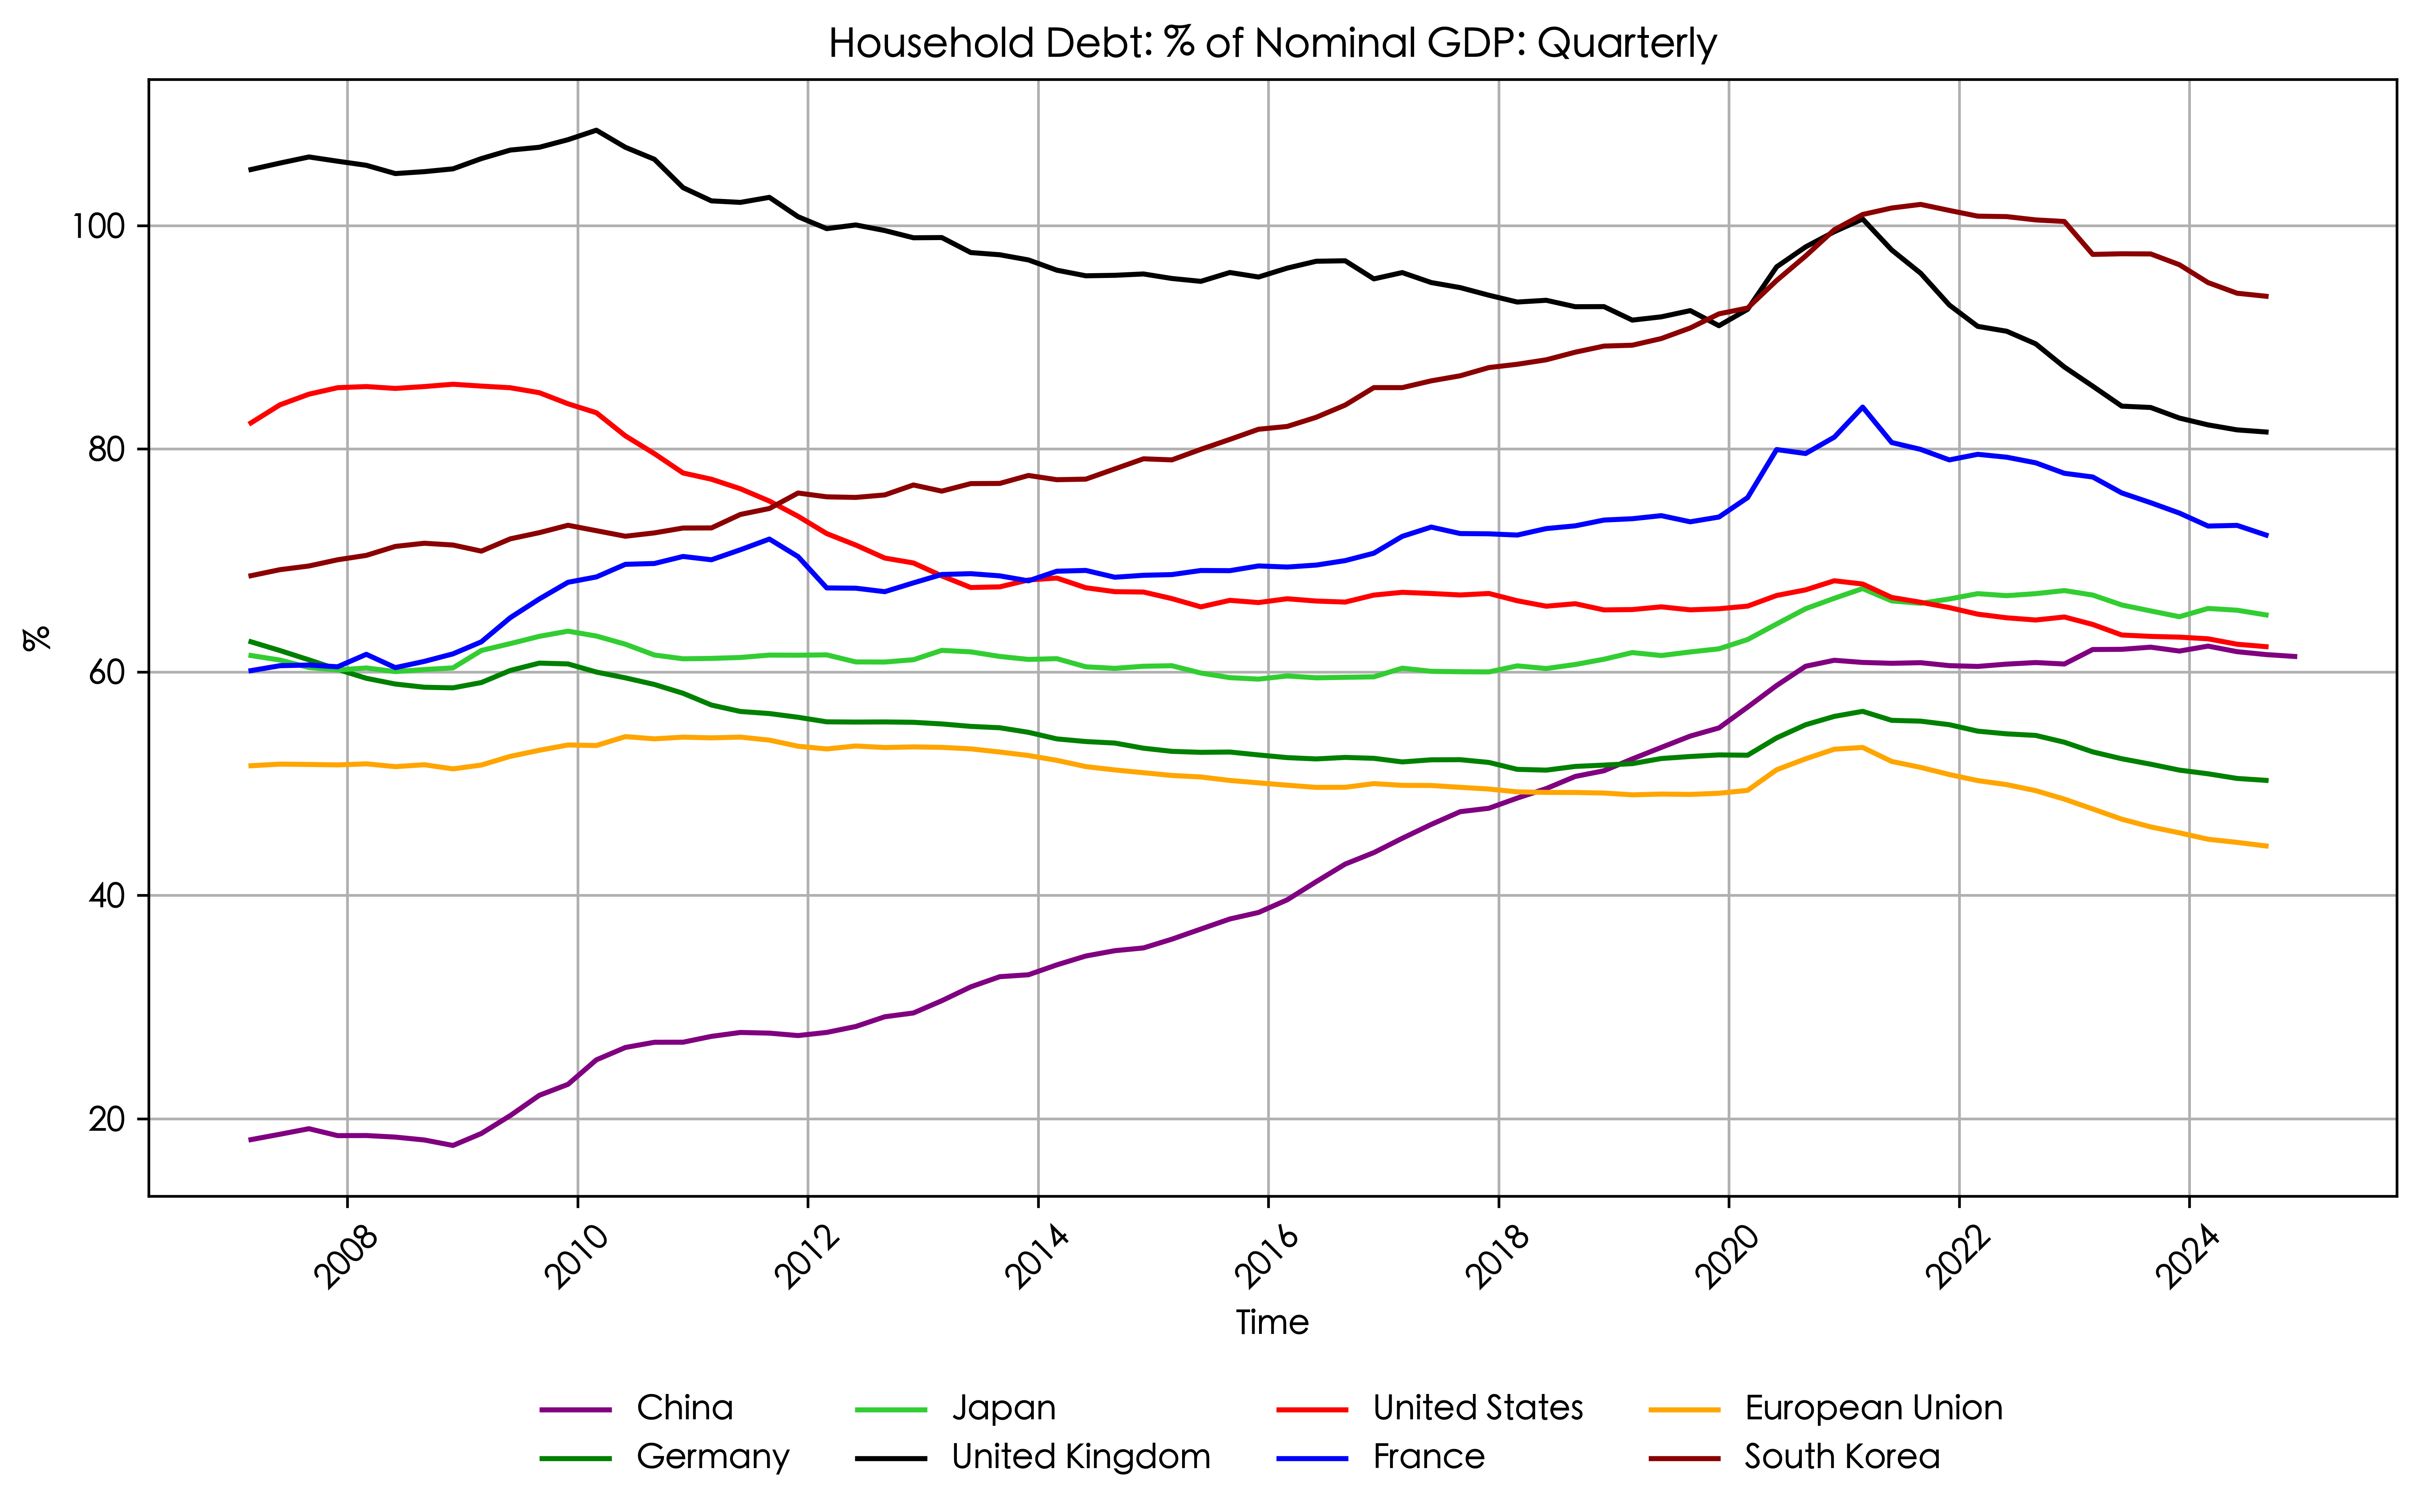

In [ ]:
# 그래프 그리기
plt.figure(figsize=(12, 6), dpi=600)
for country in df_gdp.columns[1:]:  # 'Region' 컬럼 제외하고 각 나라별 데이터 그리기
    plt.plot(df_gdp["Region"], df_gdp[country], label=country, color=colors.get(country, "gray"))

# 그래프 서식 설정
plt.title("Household Debt: % of Nominal GDP: Quarterly")  # 제목
plt.xlabel("Time")  # x축 라벨
plt.ylabel("%")  # y축 라벨
plt.grid(True)  # 격자 표시
plt.xticks(rotation=45)  # x축 라벨 회전
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=4, frameon=False)